In [2]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import svm
import pandas as pd
import numpy as np
import os


df = pd.read_csv(r'C:\Users\Saim\Downloads\data.csv')
df.head(10)

,Unnamed: 0,Addthis,Bebo,Blogcatalog,Blogger,Buddymedia,Cnet,Conduit,Customerlobby,Delicious,...,Vimeo,Vocus,Wetpaint,Wordpress,Xanga,Yelp,Yfrog,Youtube,Yuku,Click
0,dmp923122274,0,0,2,0,0,3,6,0,0,...,0,0,0,4,0,0,1,0,1,0
1,dmp458034174,0,3,0,0,0,0,1,0,0,...,0,0,0,12,0,2,2,12,0,0
2,dmp364043571,0,2,0,0,0,0,0,0,2,...,0,0,0,11,0,0,0,0,0,0
3,dmp461339655,0,0,0,0,0,0,0,0,0,...,0,0,0,6,0,0,0,22,0,0
4,dmp549691332,0,0,0,0,0,5,7,0,0,...,0,0,1,0,0,0,1,0,0,0
5,dmp526137646,0,0,0,16,0,0,6,0,0,...,0,0,0,0,0,0,0,13,0,0
6,dmp229602119,0,0,0,15,0,2,0,0,0,...,0,0,0,0,0,0,1,0,2,0
7,dmp432025886,0,2,3,0,0,0,10,0,0,...,0,0,0,0,0,3,0,2,0,1
8,dmp978420782,2,0,0,0,0,2,10,0,0,...,0,0,0,0,0,0,0,0,0,0
9,dmp319040990,0,0,0,0,0,0,4,0,0,...,3,0,0,0,0,0,2,10,0,0


In [4]:
print("Columns with number of null value rows are:\n ", df.isnull().sum())

Columns with number of null value rows are:
  Unnamed: 0     0
Addthis        0
Bebo           0
Blogcatalog    0
Blogger        0
              ..
Yelp           0
Yfrog          0
Youtube        0
Yuku           0
Click          0
Length: 83, dtype: int64


In [5]:
""""Takes a pandas dataframe and converts all entries to numeric"""
def convert_to_numeric(dataframe):
    columns = []
    
    for column in dataframe.columns:
        columns.append(column)
    # Drops all columns from the df and rejoins everything but now coercing non-numeric to numeric
    num_df = (dataframe.drop(columns, axis=1)
             .join(dataframe[columns].apply(pd.to_numeric, errors='coerce')))
    
    print("Columns with number of null value rows are:\n ", num_df.isnull().sum())
    
    return num_df

numeric_df = convert_to_numeric(df)

Columns with number of null value rows are:
  Unnamed: 0     10000
Addthis            0
Bebo               0
Blogcatalog        0
Blogger            0
               ...  
Yelp               0
Yfrog              0
Youtube            0
Yuku               0
Click              0
Length: 83, dtype: int64


In [6]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [7]:
numeric_df.describe() # this will give you the average of all columns (and other stuff too)
n_df = numeric_df.fillna(0.075)


In [32]:
def outlier_detection(dataframe):
 
    model = IsolationForest(contamination = 0.01,
                                random_state = 42,
                                bootstrap = True)
    model.fit(dataframe)
    dataframe["IForest"] = pd.Series(model.predict(dataframe))
    
    df = dataframe[dataframe["IForest"] != -1]
     
    return df

out = outlier_detection(n_df)

out.head()

,Unnamed: 0,Addthis,Bebo,Blogcatalog,Blogger,Buddymedia,Cnet,Conduit,Customerlobby,Delicious,...,Vocus,Wetpaint,Wordpress,Xanga,Yelp,Yfrog,Youtube,Yuku,Click,IForest
0,0.075,0,0,2,0,0,3,6,0,0,...,0,0,4,0,0,1,0,1,0,1
1,0.075,0,3,0,0,0,0,1,0,0,...,0,0,12,0,2,2,12,0,0,1
2,0.075,0,2,0,0,0,0,0,0,2,...,0,0,11,0,0,0,0,0,0,1
3,0.075,0,0,0,0,0,0,0,0,0,...,0,0,6,0,0,0,22,0,0,1
4,0.075,0,0,0,0,0,5,7,0,0,...,0,1,0,0,0,1,0,0,0,1


In [9]:
X = out.iloc[:,1:-2]
y = out.iloc[:,-2]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 42
                                                   )

svclassifier = SVC(kernel='linear')
fitted_svm = svclassifier.fit(X_train, y_train)

svm_pred = fitted_svm.predict(X_test)

print(confusion_matrix(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

[[1708   29]
 [  26  217]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1737
           1       0.88      0.89      0.89       243

    accuracy                           0.97      1980
   macro avg       0.93      0.94      0.94      1980
weighted avg       0.97      0.97      0.97      1980



In [10]:
score = cross_val_score(svclassifier, X, y, cv=5)
print("Average 5-Fold CV Score: {}".format(np.mean(score)))

Average 5-Fold CV Score: 0.9728282828282827


In [11]:
random_forest_clf = RandomForestClassifier(random_state = 42)
random_forest_fit = random_forest_clf.fit(X_train, y_train)

tree_pred = random_forest_fit.predict(X_test)

print(confusion_matrix(y_test, tree_pred))
print(classification_report(y_test, tree_pred))

[[1737    0]
 [ 240    3]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1737
           1       1.00      0.01      0.02       243

    accuracy                           0.88      1980
   macro avg       0.94      0.51      0.48      1980
weighted avg       0.89      0.88      0.82      1980



In [12]:
score = cross_val_score(random_forest_clf, X, y, cv = 10)
print("Average 10-Fold CV Score: {}".format(np.mean(score)))

Average 10-Fold CV Score: 0.8862626262626263


In [13]:
svclassifier.coef_


array([[0.56929833, 0.35684964, 1.05772822, 0.25201502, 0.        ,
        0.5223184 , 0.15402512, 2.        , 0.52515397, 0.22029206,
        0.21811586, 1.35820799, 0.48218648, 0.18864668, 0.0251937 ,
        0.32911245, 1.92715973, 0.98760582, 0.05079917, 1.22455213,
        0.34184731, 0.14796499, 0.50996076, 0.45431862, 0.21153226,
        0.3568583 , 0.86013094, 1.94459515, 2.3403409 , 0.19268029,
        2.21777971, 0.55578801, 1.18476749, 0.4327495 , 0.28438559,
        0.67300137, 1.78017447, 0.27564451, 2.05259623, 0.12850208,
        0.75236364, 1.21419284, 0.29798705, 0.20270391, 0.19201029,
        0.52597737, 0.16268828, 0.69026653, 0.59227653, 0.73310878,
        0.90028872, 1.2638294 , 0.44437753, 0.86840829, 0.4919926 ,
        1.47513049, 0.63260247, 1.82332372, 0.52305315, 0.44383041,
        1.25113131, 0.28508827, 1.44715423, 1.35220852, 3.61340675,
        0.51621845, 1.49645751, 1.        , 0.11602362, 0.71183075,
        2.        , 0.84665223, 0.51804726, 1.20

In [14]:
feature_coeff = np.abs(fitted_svm.coef_).ravel()
print(feature_coeff)

idx_third = feature_coeff.argsort()[:3]
print(idx_third)

[0.56929833 0.35684964 1.05772822 0.25201502 0.         0.5223184
 0.15402512 2.         0.52515397 0.22029206 0.21811586 1.35820799
 0.48218648 0.18864668 0.0251937  0.32911245 1.92715973 0.98760582
 0.05079917 1.22455213 0.34184731 0.14796499 0.50996076 0.45431862
 0.21153226 0.3568583  0.86013094 1.94459515 2.3403409  0.19268029
 2.21777971 0.55578801 1.18476749 0.4327495  0.28438559 0.67300137
 1.78017447 0.27564451 2.05259623 0.12850208 0.75236364 1.21419284
 0.29798705 0.20270391 0.19201029 0.52597737 0.16268828 0.69026653
 0.59227653 0.73310878 0.90028872 1.2638294  0.44437753 0.86840829
 0.4919926  1.47513049 0.63260247 1.82332372 0.52305315 0.44383041
 1.25113131 0.28508827 1.44715423 1.35220852 3.61340675 0.51621845
 1.49645751 1.         0.11602362 0.71183075 2.         0.84665223
 0.51804726 1.20836316 0.77909407 0.45491008 1.16569064 1.09202726
 0.49342475 0.06650313 0.61474616]
[ 4 14 18]


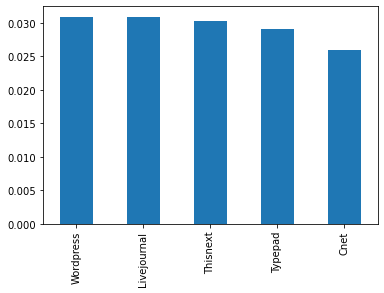

In [15]:
def feature_selection(X_trn, y_trn):

    model = ExtraTreesClassifier()
    model.fit(X_trn, y_trn)
    
    feat_importances = pd.Series(model.feature_importances_, index = X.columns)
    feat_importances.nlargest(5).plot(kind='bar')
    plt.show()

feature_selection(X_train, y_train)

In [16]:

coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns), "Coefs", fitted_svm.coef_.transpose())

In [17]:

f = coef_table.sort_values('Coefs')
print(f)

                0     Coefs
4      Buddymedia  0.000000
14        Dropbox  0.025194
18       Facebook  0.050799
79        Youtube  0.066503
68        Twitter  0.116024
..            ...       ...
7   Customerlobby  2.000000
38      Mybloglog  2.052596
30        Lithium  2.217780
28       Kickapps  2.340341
64       Thisnext  3.613407

[81 rows x 2 columns]


In [18]:
def coef_features(x_trn, fitted_model):
    
    coef_table = pd.DataFrame(list(x_trn.columns)).copy()
    coef_table.insert(len(coef_table.columns), "Coefs", fitted_model.coef_.transpose())
    
    sort_ascending = coef_table.sort_values('Coefs')
    
    return sort_ascending

coef_features(X_train, fitted_svm)
    

,0,Coefs
4,Buddymedia,0.000000
14,Dropbox,0.025194
18,Facebook,0.050799
79,Youtube,0.066503
68,Twitter,0.116024
...,...,...
7,Customerlobby,2.000000
38,Mybloglog,2.052596
30,Lithium,2.217780
28,Kickapps,2.340341


In [36]:
out.head(4)

d = out.drop(['Unnamed: 0'], axis = 1)

In [37]:
costs = []

for column in out.sum() * 0.1:
   costs.append(column)

fram = pd.DataFrame(list(out.columns)).copy()
fram.insert(len(fram.columns),"Costs", costs)

sor = fram.sort_values("Costs")

with pd.option_context('display.max_rows', 999):
    print (sor)
    


                0         Costs
5      Buddymedia  0.000000e+00
8   Customerlobby  2.000000e-01
71    Ubertwitter  1.700000e+00
12           Docs  3.200000e+00
68          Twine  1.670000e+01
31        Lithium  1.870000e+01
61       Startaid  1.970000e+01
56      Sharethis  2.090000e+01
74          Vocus  3.920000e+01
29       Kickapps  4.230000e+01
63        Sysomos  4.400000e+01
11          Diigo  7.394000e+01
0      Unnamed: 0  7.425000e+01
52        Radian6  7.580000e+01
27       Jumptags  7.600000e+01
58    Sliderocket  8.190000e+01
72         Viadeo  8.340000e+01
67      Tweetdeck  9.470000e+01
41       Netvibes  1.120000e+02
82          Click  1.136000e+02
48          Plaxo  1.230000e+02
18       Evernote  1.625000e+02
49          Plurk  1.645000e+02
37      Mouthshut  1.689000e+02
20          Faves  1.701000e+02
50      Posterous  1.764000e+02
17       Epinions  1.784000e+02
65       Thisnext  1.987000e+02
81           Yuku  2.018000e+02
21     Feedburner  2.137000e+02
57      